# Exploration, Nettoyage Et Feature Engineering

Ce notebook a pour objectif d’explorer et de préparer les données de ridership de 2019 à 2025 afin de les rendre exploitables pour la modélisation prédictive.

### 1-Import des bibliothèques


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

# Configuration des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### 2-Chargement des données 

In [2]:
df = pd.read_csv('frequentation-journaliere-par-tranche-horaire.csv', sep=';')

In [3]:
df.shape

(57916, 10)

In [4]:
df.head()

,Date,Day Week,Schedule Type,Week Index,Index Day Week,Time Slot,Number of Boarding Passengers,Number of Disembarking Passengers,Number of Stops,donnees_definitives
0,2022-12-01,4-Jeudi,NORMAL,48,4,07,58042.12,51136.43,14954,True
1,2022-12-01,4-Jeudi,NORMAL,48,4,12,47433.68,47636.50,11464,True
2,2022-12-01,4-Jeudi,NORMAL,48,4,14,39346.58,39148.82,10878,True
3,2022-12-01,4-Jeudi,NORMAL,48,4,19,37301.29,40494.53,12947,True
4,2022-12-01,4-Jeudi,NORMAL,48,4,10,31429.37,31981.80,10947,True


In [5]:
df.columns.tolist()

['Date',
 'Day Week',
 'Schedule Type',
 'Week Index',
 'Index Day Week',
 'Time Slot',
 'Number of Boarding Passengers',
 'Number of Disembarking Passengers',
 'Number of Stops',
 'donnees_definitives']

### 3-Exploration initiale

In [6]:
df.dtypes

Date                                  object
Day Week                              object
Schedule Type                         object
Week Index                             int64
Index Day Week                         int64
Time Slot                             object
Number of Boarding Passengers        float64
Number of Disembarking Passengers    float64
Number of Stops                        int64
donnees_definitives                     bool
dtype: object

In [7]:
df.isnull().sum()

Date                                    0
Day Week                                0
Schedule Type                           0
Week Index                              0
Index Day Week                          0
Time Slot                            1451
Number of Boarding Passengers           0
Number of Disembarking Passengers       0
Number of Stops                         0
donnees_definitives                     0
dtype: int64

In [8]:
df.describe()

,Week Index,Index Day Week,Number of Boarding Passengers,Number of Disembarking Passengers,Number of Stops
count,57916.000000,57916.000000,57916.000000,57916.000000,57916.000000
mean,26.070447,4.022222,23387.466923,23388.507221,7858.736325
std,14.838676,1.989459,19935.297808,19902.616432,4381.098257
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,13.000000,2.000000,5904.510000,5586.905000,5137.000000
50%,26.000000,4.000000,18601.635000,18405.550000,7324.000000
75%,39.000000,6.000000,37639.512500,37946.855000,11177.250000
max,53.000000,7.000000,97043.830000,98411.990000,16329.000000


#### Statistiques sur les variables clés

In [9]:
df[['Number of Boarding Passengers',
    'Number of Disembarking Passengers',
    'Number of Stops']].describe()

,Number of Boarding Passengers,Number of Disembarking Passengers,Number of Stops
count,57916.000000,57916.000000,57916.000000
mean,23387.466923,23388.507221,7858.736325
std,19935.297808,19902.616432,4381.098257
min,0.000000,0.000000,1.000000
25%,5904.510000,5586.905000,5137.000000
50%,18601.635000,18405.550000,7324.000000
75%,37639.512500,37946.855000,11177.250000
max,97043.830000,98411.990000,16329.000000


#### Analyse des variables catégorielles

In [10]:
print(df['Day Week'].value_counts())

Day Week
5-Vendredi    8741
6-Samedi      8629
3-Mercredi    8142
2-Mardi       8135
4-Jeudi       8123
1-Lundi       8123
7-Dimanche    8023
Name: count, dtype: int64


In [11]:
print(df['Schedule Type'].value_counts())

Schedule Type
NORMAL      30139
VACANCES    10017
DIMANCHE     9204
SAMEDI       8556
Name: count, dtype: int64


In [12]:
print(df['Date'].value_counts())

Date
2024-03-15    26
2024-03-09    26
2022-12-02    26
2024-03-08    26
2024-03-23    26
              ..
2021-09-02    22
2021-10-04    22
2021-10-06    22
2021-10-11    22
2021-11-15    22
Name: count, Length: 2492, dtype: int64


In [13]:
print(df['donnees_definitives'].value_counts())

donnees_definitives
True     56668
False     1248
Name: count, dtype: int64


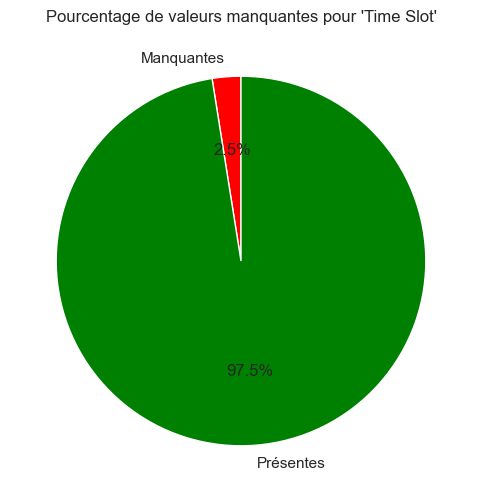

In [14]:
feature_name = "Time Slot"  

total = len(df)
missing = df[feature_name].isnull().sum()
present = total - missing

sizes = [missing, present]
labels = ['Manquantes', 'Présentes']

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title(f"Pourcentage de valeurs manquantes pour '{feature_name}'")
plt.show()


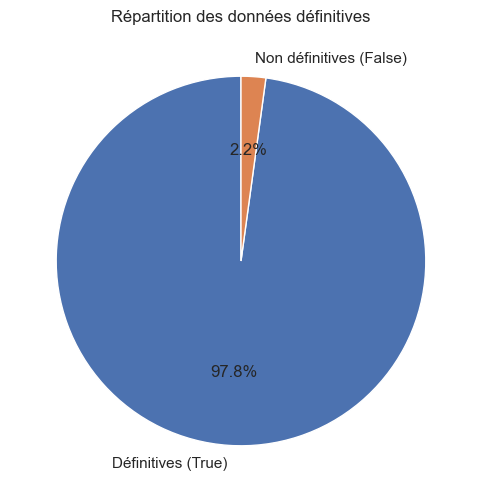

In [15]:
feature_name = "donnees_definitives"

total = len(df)
true_count = (df[feature_name] == True).sum()
false_count = (df[feature_name] == False).sum()

sizes = [true_count, false_count]
labels = ['Définitives (True)', 'Non définitives (False)']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des données définitives")
plt.show()

### 4-Nettoyage des données 

In [16]:
count_passager_bo_null = (df['Number of Boarding Passengers'] == 0).sum()
print(f"Nombre de passagers montant avec valeur 0 : {count_passager_bo_null}")
count_passager_Di_null = (df['Number of Disembarking Passengers'] == 0).sum()
print(f"Nombre de passagers descendant avec valeur 0 : {count_passager_Di_null}")

Nombre de passagers montant avec valeur 0 : 356
Nombre de passagers descendant avec valeur 0 : 318


In [17]:
# Filtrer uniquement les données définitives
df = df[~(df['donnees_definitives'] == False)].copy()
print(f"Données après filtrage des données non définitives : {df.shape}")
print(df['donnees_definitives'].value_counts())

Données après filtrage des données non définitives : (56668, 10)
donnees_definitives
True    56668
Name: count, dtype: int64


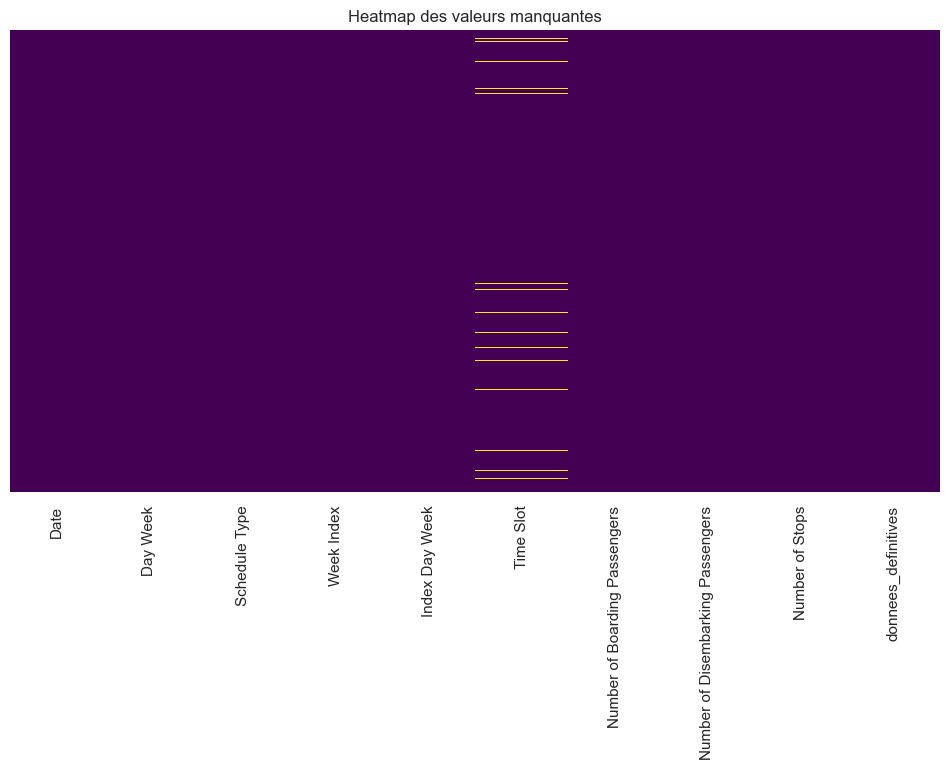

In [18]:
# Heatmap des valeurs manquantes
plt.figure()
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Heatmap des valeurs manquantes")
plt.show()

La heatmap montre que ton dataset contient presque aucune valeur manquante, la plupart des colonnes sont complètes (violettes), avec seulement quelques valeurs isolées manquantes dans la colonne Time Slot

In [19]:
# Remplacer les "-" par NaN dans Time Slot
df['Time Slot'] = df['Time Slot'].replace("-", np.nan)
print(f"Valeurs manquantes après traitement Time Slot :")
print(df.isna().sum())

Valeurs manquantes après traitement Time Slot :
Date                                    0
Day Week                                0
Schedule Type                           0
Week Index                              0
Index Day Week                          0
Time Slot                            1823
Number of Boarding Passengers           0
Number of Disembarking Passengers       0
Number of Stops                         0
donnees_definitives                     0
dtype: int64


In [20]:
df = df[~(df['Time Slot'].isna())].copy()
print(f"Données après suppression des Time Slot manquants : {df.shape}")

Données après suppression des Time Slot manquants : (54845, 10)


In [21]:
df["Day Week"].head()

0    4-Jeudi
1    4-Jeudi
2    4-Jeudi
3    4-Jeudi
4    4-Jeudi
Name: Day Week, dtype: object

In [22]:
df["Day Week"] = df["Day Week"].str.split("-").str[1]

In [23]:
df["Day Week"].head()

0    Jeudi
1    Jeudi
2    Jeudi
3    Jeudi
4    Jeudi
Name: Day Week, dtype: object

### 5. Transformation Des Types De Données 

In [24]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Day Week"] = df["Day Week"].astype("category")
df["Schedule Type"] = df["Schedule Type"].astype("category")
df["Week Index"] = df["Week Index"].astype("int8")
df["Index Day Week"] = df["Index Day Week"].astype("uint8")
df["Time Slot"] = df["Time Slot"].astype("int8")
df['Number of Boarding Passengers'] = df['Number of Boarding Passengers'].fillna(0).astype(int)
df['Number of Disembarking Passengers'] = df['Number of Disembarking Passengers'].fillna(0).astype(int)

In [25]:
df.dtypes

Date                                 datetime64[ns]
Day Week                                   category
Schedule Type                              category
Week Index                                     int8
Index Day Week                                uint8
Time Slot                                      int8
Number of Boarding Passengers                 int64
Number of Disembarking Passengers             int64
Number of Stops                               int64
donnees_definitives                            bool
dtype: object

In [26]:
nb_invalid_dates = df['Date'].isna().sum()
print(f"Nombre de dates invalides : {nb_invalid_dates}")

Nombre de dates invalides : 0


### 6. Vérification De Cohérence Des Données 

Cette section vérifie la cohérence entre plusieurs colonnes: la date, le jour, leur index, le type d’horaire et l’index de semaine  pour s’assurer que les données sont logiques et correctes.

In [27]:
# Vérifier la cohérence entre Day Week et Index Day Week
day_to_index = {
    'Lundi': 1, 'Mardi': 2, 'Mercredi': 3, 'Jeudi': 4,
    'Vendredi': 5, 'Samedi': 6, 'Dimanche': 7
}

coherent_mask = df.apply(
    lambda row: row['Index Day Week'] == day_to_index.get(row['Day Week'], 0),
    axis=1
)

nb_coherent = coherent_mask.sum()
nb_incoherent = len(coherent_mask) - nb_coherent
print(f"Lignes cohérentes (Day Week vs Index) : {nb_coherent}")
print(f"Lignes incohérentes (Day Week vs Index) : {nb_incoherent}")

Lignes cohérentes (Day Week vs Index) : 54845
Lignes incohérentes (Day Week vs Index) : 0


In [28]:
# Vérifier la cohérence entre Date et Day Week
day_to_weekday = {
    'Lundi': 0, 'Mardi': 1, 'Mercredi': 2, 'Jeudi': 3,
    'Vendredi': 4, 'Samedi': 5, 'Dimanche': 6
}

date_coherent_mask = df.apply(
    lambda row: pd.notna(row['Date']) and row['Date'].weekday() == day_to_weekday.get(row['Day Week'], -1),
    axis=1
)

nb_date_coherent = date_coherent_mask.sum()
nb_date_incoherent = len(date_coherent_mask) - nb_date_coherent
print(f"Lignes cohérentes (Date vs Day Week) : {nb_date_coherent}")
print(f"Lignes incohérentes (Date vs Day Week) : {nb_date_incoherent}")

Lignes cohérentes (Date vs Day Week) : 54845
Lignes incohérentes (Date vs Day Week) : 0


In [29]:
# Vérification de cohérence entre Schedule Type et Index Day Week
def coherence_check(row):
    sched = str(row["Schedule Type"]).upper()
    if (sched == "DIMANCHE" and row["Index Day Week"] != 7) \
       or (sched == "SAMEDI" and row["Index Day Week"] != 6) \
       or (sched == "NORMAL" and row["Index Day Week"] in [6, 7]):
        return False
    return True

coherent_mask = df.apply(coherence_check, axis=1)
incoherent_rows = df[~coherent_mask]
print(f"Nombre de lignes incohérentes (Schedule vs Index) : {len(incoherent_rows)}")
if len(incoherent_rows) > 0:
    print(incoherent_rows[["Day Week", "Index Day Week", "Schedule Type"]].head(20))

Nombre de lignes incohérentes (Schedule vs Index) : 1145
     Day Week  Index Day Week Schedule Type
308     Jeudi               4      DIMANCHE
309     Jeudi               4      DIMANCHE
310     Jeudi               4      DIMANCHE
364     Lundi               1      DIMANCHE
365     Lundi               1      DIMANCHE
366     Lundi               1      DIMANCHE
367     Lundi               1      DIMANCHE
368     Lundi               1      DIMANCHE
673  Vendredi               5      DIMANCHE
674  Vendredi               5      DIMANCHE
675  Vendredi               5      DIMANCHE
676  Vendredi               5      DIMANCHE
677  Vendredi               5      DIMANCHE
678  Vendredi               5      DIMANCHE
679  Vendredi               5      DIMANCHE
937  Mercredi               3      DIMANCHE
938  Mercredi               3      DIMANCHE
939  Mercredi               3      DIMANCHE
940  Mercredi               3      DIMANCHE
941  Mercredi               3      DIMANCHE


### 7. Features Engineering 

-Suppression de colonnes : **donnees_definitives** (inutile pour le modèle) et **Number of Disembarking Passengers** (fortement corrélée avec la cible, créant un data leakage).

-Schedule Type : création du type de jour à partir de la date pour distinguer jours normaux, week-ends et périodes de vacances (ex. vacances scolaires, fêtes, etc.).

-Jour, Mois, Année : extraction depuis la colonne Date pour faciliter filtrage, regroupement et analyse des données.

In [30]:
# Supprimer l'ancienne colonne Schedule Type
if 'Schedule Type' in df.columns:
    df.drop(columns=['Schedule Type'], inplace=True)


In [31]:
#les vacances scolaires Genève 2019-2025
vacances_geneve = [
    # 2019
    ("2019-10-19", "2019-11-03"), ("2019-12-21", "2020-01-05"),
    # 2020
    ("2020-02-15", "2020-02-23"), ("2020-04-04", "2020-04-19"),
    ("2020-07-04", "2020-08-16"), ("2020-10-10", "2020-10-25"),
    ("2020-12-19", "2021-01-03"),
    # 2021
    ("2021-02-13", "2021-02-21"), ("2021-04-03", "2021-04-18"),
    ("2021-07-03", "2021-08-15"), ("2021-10-09", "2021-10-24"),
    ("2021-12-18", "2022-01-02"),
    # 2022
    ("2022-02-12", "2022-02-20"), ("2022-04-02", "2022-04-17"),
    ("2022-07-02", "2022-08-14"), ("2022-10-08", "2022-10-23"),
    ("2022-12-17", "2023-01-01"),
    # 2023
    ("2023-02-18", "2023-02-26"), ("2023-04-08", "2023-04-23"),
    ("2023-07-01", "2023-08-13"), ("2023-10-07", "2023-10-22"),
    ("2023-12-23", "2024-01-07"),
    # 2024
    ("2024-02-10", "2024-02-18"), ("2024-04-06", "2024-04-21"),
    ("2024-07-06", "2024-08-18"), ("2024-10-12", "2024-10-27"),
    ("2024-12-21", "2025-01-05"),
    # 2025
    ("2025-02-08", "2025-02-16"), ("2025-04-05", "2025-04-20"),
    ("2025-07-05", "2025-08-17"), ("2025-10-11", "2025-10-26"),
    ("2025-12-20", "2026-01-04")
]

vac_ranges = [(pd.to_datetime(s), pd.to_datetime(e)) for s, e in vacances_geneve]

# les jours fériés suisses
years = df['Date'].dt.year.dropna().unique()
swiss_holidays = holidays.Switzerland(years=years, prov='GE')


In [32]:
# Fonction pour déterminer le type de jour
def determine_day_type(row):
    date = row['Date']
    if pd.isna(date):
        return "NORMAL"
    if date in swiss_holidays:
        return "VACANCES"
    for start, end in vac_ranges:
        if start <= date <= end:
            return "VACANCES"
    wd = date.weekday()
    if wd == 5:
        return "SAMEDI"
    if wd == 6:
        return "DIMANCHE"
    return "NORMAL"

In [33]:
df['Schedule Type'] = df.apply(determine_day_type, axis=1)
print("Nouvelle distribution de Schedule Type :")
print(df['Schedule Type'].value_counts())

Nouvelle distribution de Schedule Type :
Schedule Type
NORMAL      29512
VACANCES    14357
SAMEDI       5685
DIMANCHE     5291
Name: count, dtype: int64


In [34]:
# Extraction de features temporelles
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

#### Data leakage

In [35]:
num_cols = df.select_dtypes(include=[np.number]).columns

correlations = df[num_cols].corrwith(df['Number of Boarding Passengers']).abs().sort_values(ascending=False)

print("Corrélations avec la cible par ordre décroissant :")
print(correlations)


Corrélations avec la cible par ordre décroissant :
Number of Boarding Passengers        1.000000
Number of Disembarking Passengers    0.996157
Number of Stops                      0.892296
Time Slot                            0.290934
Index Day Week                       0.263849
Year                                 0.083621
Month                                0.009450
Week Index                           0.008800
Day                                  0.004096
dtype: float64


La variable Number of Disembarking Passengers présente une corrélation très élevée avec la variable cible (0.996). Cela signifie qu’elle apporte presque exactement la même information que la cible. Comme cette variable est mesurée au même moment que Number of Boarding Passengers, elle révèle indirectement la valeur que l’on cherche à prédire. Dans ce cas, son utilisation crée une situation de data leakage, car le modèle apprend une information qu’il n’est pas censé connaître au moment de la prédiction réelle. Donc on doit la supprimer.

In [36]:
df = df.drop(columns=['Number of Disembarking Passengers'])


In [37]:
df = df.drop(columns=['donnees_definitives'])

### 8. Visualisations Exploratoires

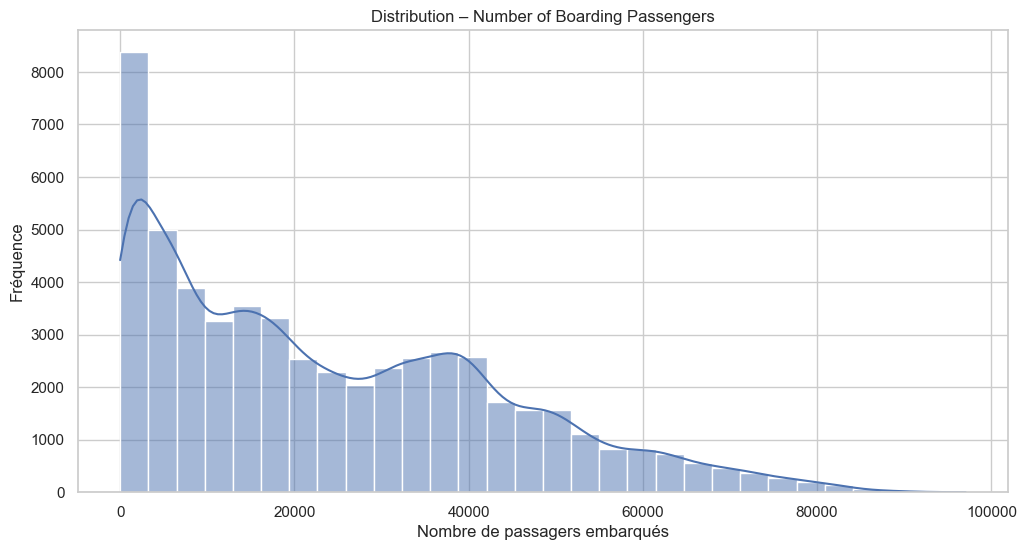

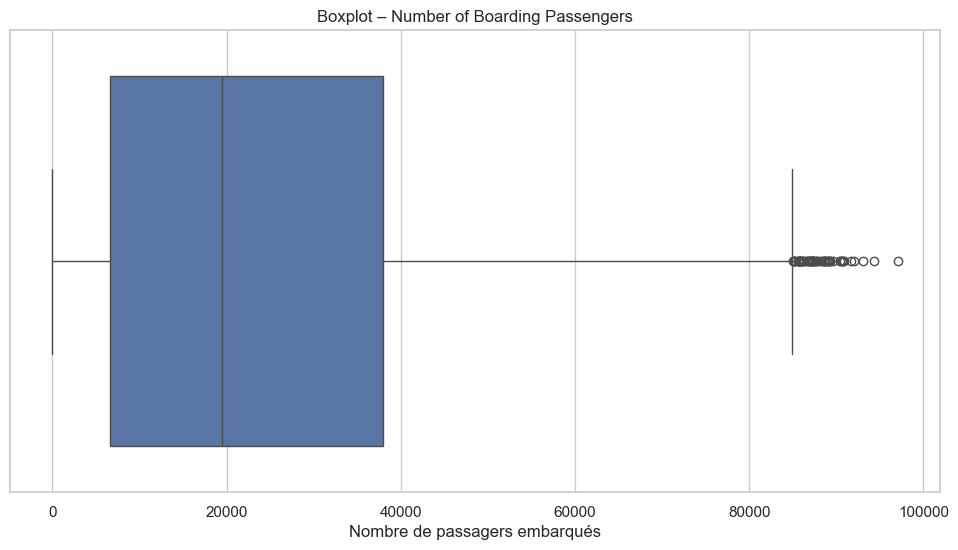

In [38]:
# Distribution des passagers embarqués
plt.figure()
sns.histplot(df['Number of Boarding Passengers'], bins=30, kde=True)
plt.title("Distribution – Number of Boarding Passengers")
plt.xlabel("Nombre de passagers embarqués")
plt.ylabel("Fréquence")
plt.show()

# Boxplot des passagers embarqués
plt.figure()
sns.boxplot(x=df['Number of Boarding Passengers'])
plt.title("Boxplot – Number of Boarding Passengers")
plt.xlabel("Nombre de passagers embarqués")
plt.show()

#### Histogramme – Distribution des passagers montants

La plupart des transports transportent peu ou moyennement de passagers (0–40 000). La distribution est asymétrique à droite, avec quelques jours exceptionnellement chargés (70 000–100 000). Les fréquences diminuent progressivement pour les valeurs élevées.
#### Boxplot – Dispersion et outliers
Le boxplot confirme l’asymétrie : la médiane est basse, la boîte est large, et de nombreux outliers apparaissent vers les valeurs élevées. Cela reflète des journées avec un trafic très important par rapport à la majorité des vols.
#### Conclusion courte
Le trafic des passagers montants est majoritairement faible à moyen, avec quelques pics exceptionnels, rendant la distribution très irrégulière.

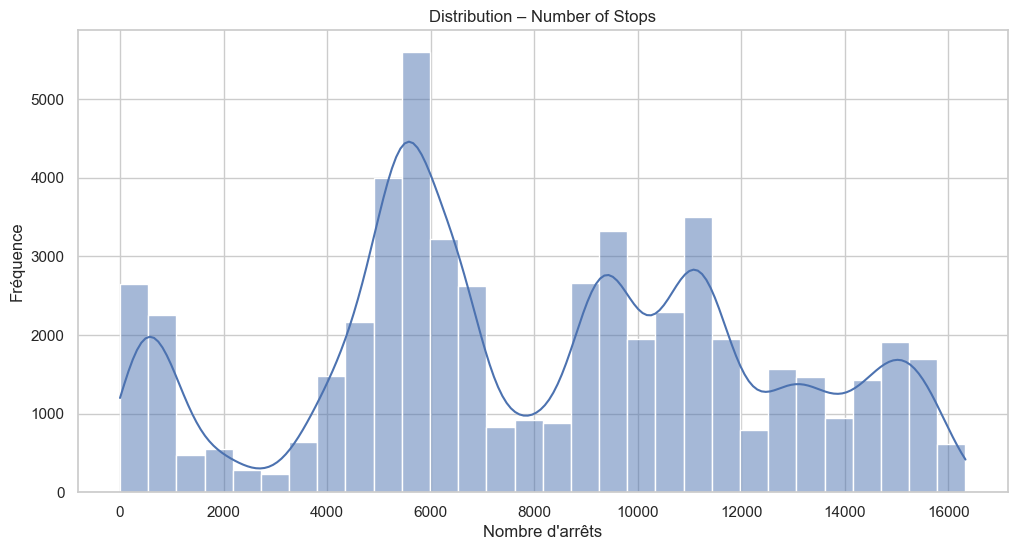

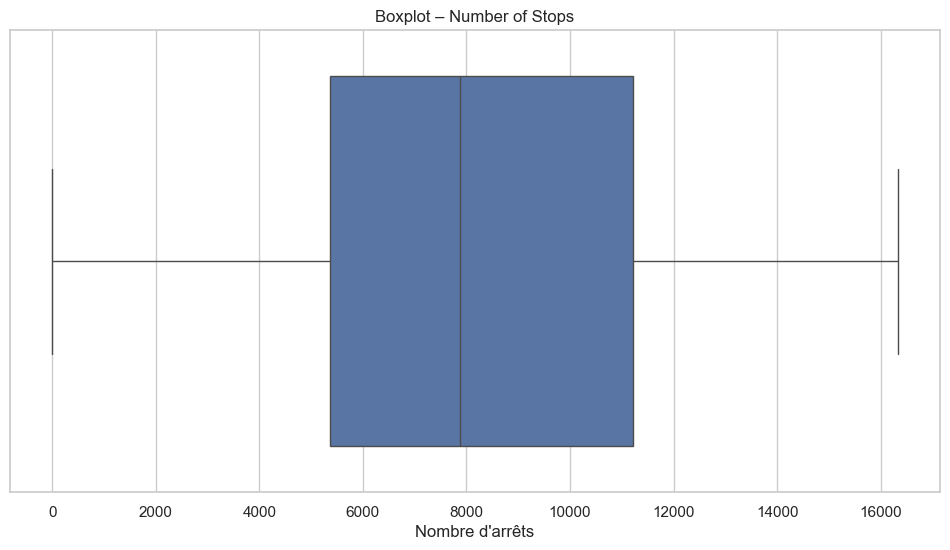

In [40]:
# Distribution du nombre d'arrêts
plt.figure()
sns.histplot(df['Number of Stops'], bins=30, kde=True)
plt.title("Distribution – Number of Stops")
plt.xlabel("Nombre d'arrêts")
plt.ylabel("Fréquence")
plt.show()

# Boxplot du nombre d'arrêts
plt.figure()
sns.boxplot(x=df['Number of Stops'])
plt.title("Boxplot – Number of Stops")
plt.xlabel("Nombre d'arrêts")
plt.show()

#### Histogramme (Distribution)
La distribution du nombre d’arrêts est très dispersée et montre plusieurs pics, indiquant qu’il existe plusieurs groupes de lignes avec des nombres d’arrêts différents. Les valeurs autour de 5 000–6 000 et 10 000–12 000 sont les plus fréquentes, tandis que les très petits ou très grands nombres sont rares
#### Boxplot
Le rectangle du boxplot s’étend d’environ 5 000 à 15 000, avec une médiane proche de 8 000, ce qui montre que la majorité des lignes se situe dans cette plage. La dispersion est large, mais il n’y a pas de points isolés clairement définis comme outliers.
#### Conclusion
La distribution et le boxplot montrent que la variable est très variée avec une large plage de valeurs, mais aucun outlier strict n’est détecté.

### 9. Analayses De Tendances Et Relations

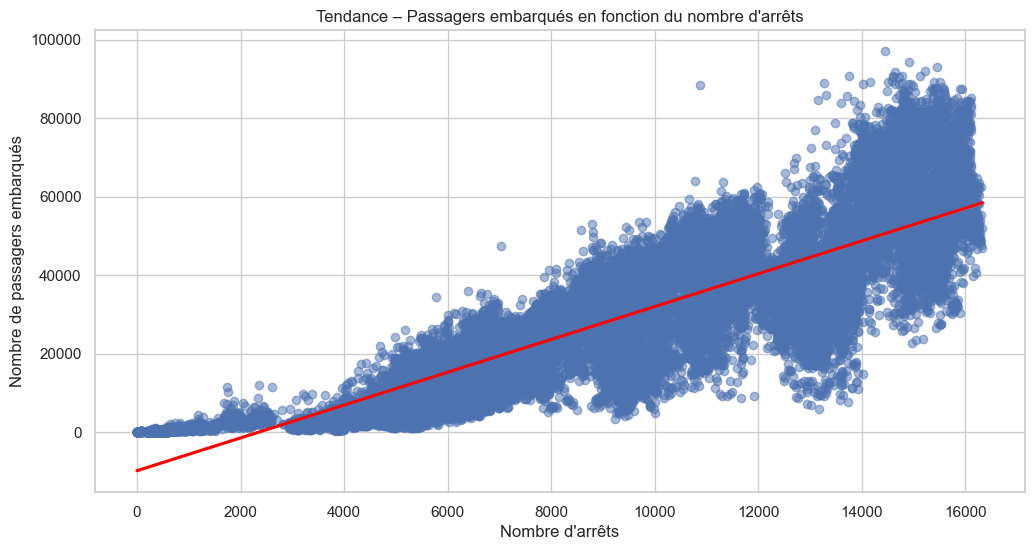

In [41]:
# Passagers embarqués vs Nombre d'arrêts
plt.figure()
sns.regplot(x='Number of Stops', y='Number of Boarding Passengers', 
            data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Tendance – Passagers embarqués en fonction du nombre d'arrêts")
plt.xlabel("Nombre d'arrêts")
plt.ylabel("Nombre de passagers embarqués")
plt.show()

Le graphique montre une relation positive : plus le nombre d’arrêts augmente, plus le nombre de passagers débarqués tend à être élevé.

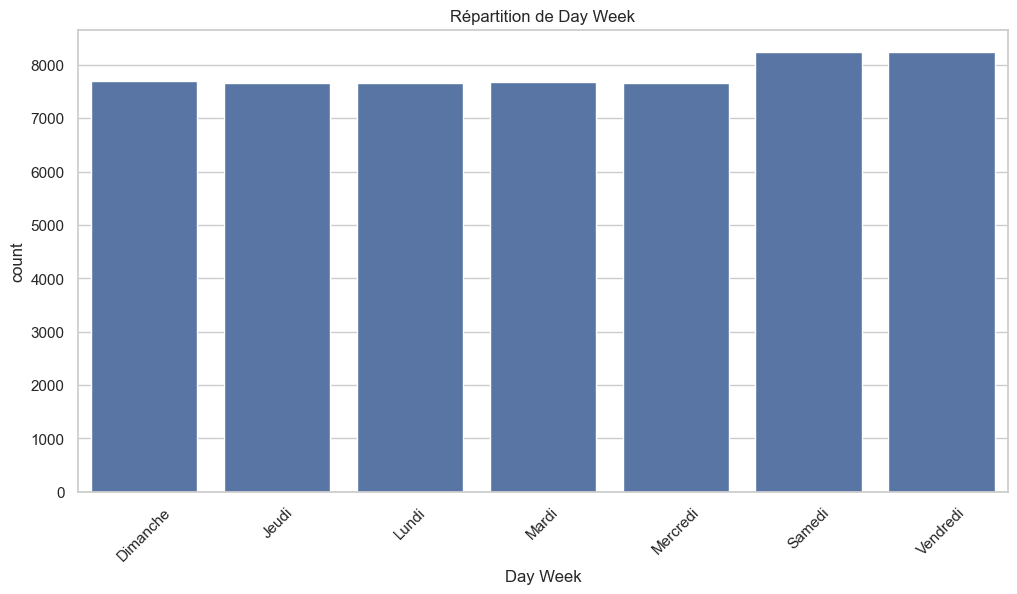

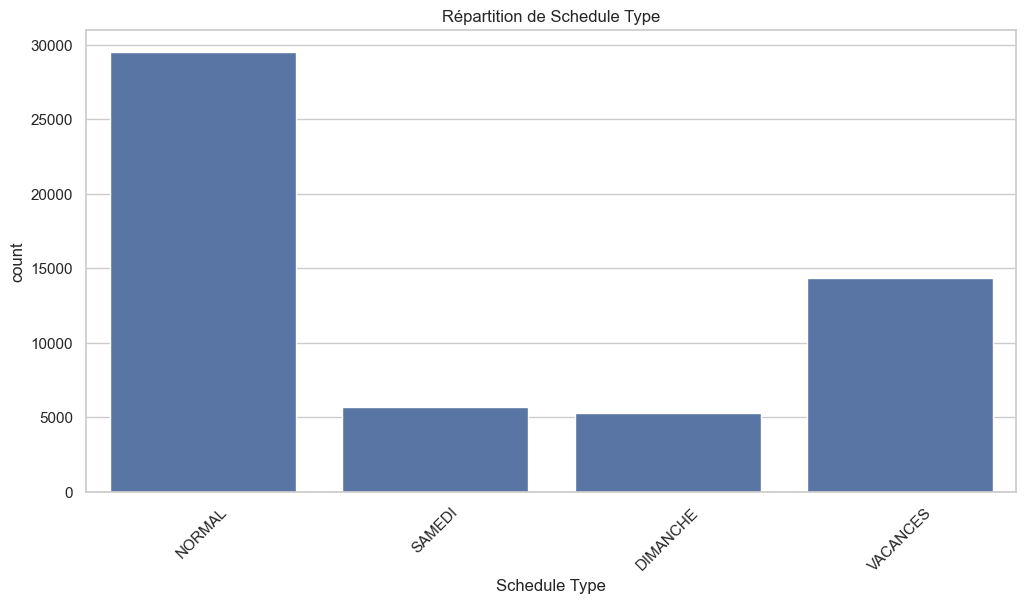

In [42]:
# Répartition par jour de la semaine
cat_cols = ['Day Week', 'Schedule Type']
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Répartition de {col}")
    plt.xticks(rotation=45)
    plt.show()

#### Jour de la semaine
La répartition est globalement équilibrée, avec un léger pic vendredi et samedi et le point le plus bas mercredi.
#### Schedule Type
La majorité des observations est NORMAL, suivie par VACANCES, tandis que SAMEDI et DIMANCHE sont beaucoup moins fréquents.

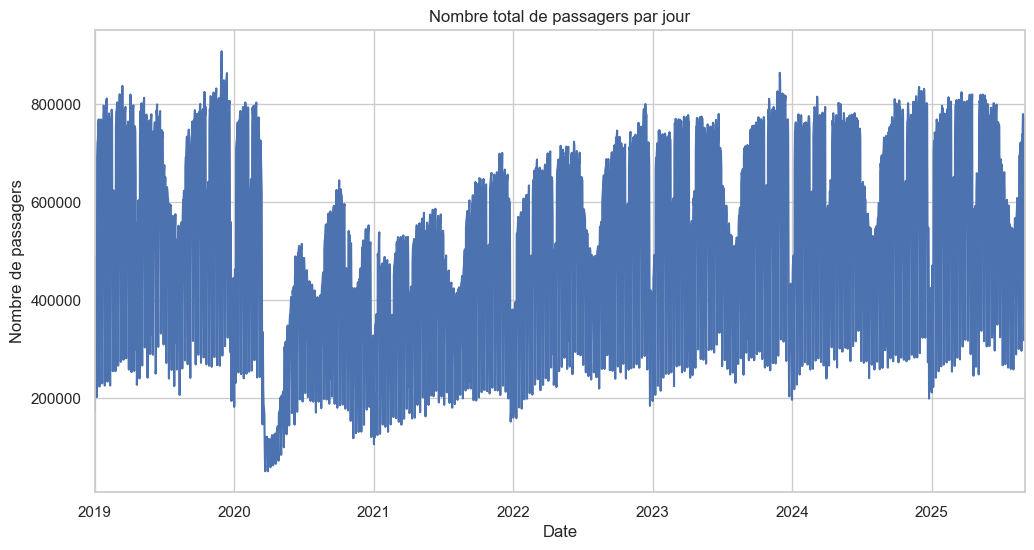

In [43]:
# Nombre total de passagers par jour
plt.figure()
df.groupby('Date')['Number of Boarding Passengers'].sum().plot()
plt.title("Nombre total de passagers par jour")
plt.xlabel("Date")
plt.ylabel("Nombre de passagers")
plt.show()

#### Analyse du graphique — Nombre de passagers (2019–2025)
Le trafic montre une forte saisonnalité annuelle avec des pics et des creux liés aux vacances et saisons touristiques. En 2020, une chute brutale (~100k–200k passagers) correspond au COVID-19, suivie d’une reprise progressive à partir de 2021. De 2023 à 2025, le trafic est élevé et stable.


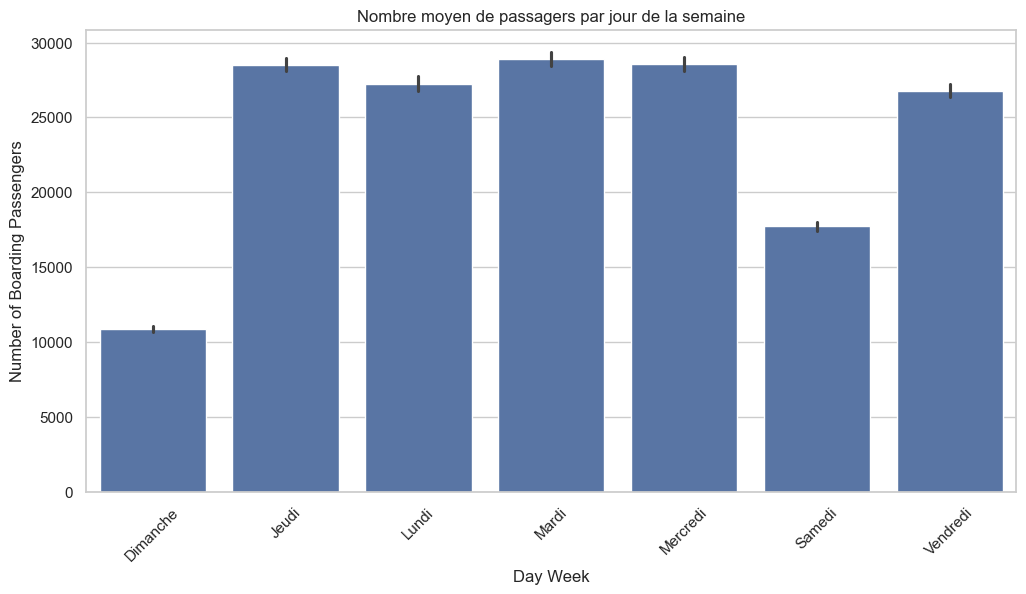

In [44]:
# Moyenne de passagers par jour de la semaine
plt.figure()
sns.barplot(x='Day Week', y='Number of Boarding Passengers', data=df, estimator=np.mean)
plt.title("Nombre moyen de passagers par jour de la semaine")
plt.xticks(rotation=45)
plt.show()

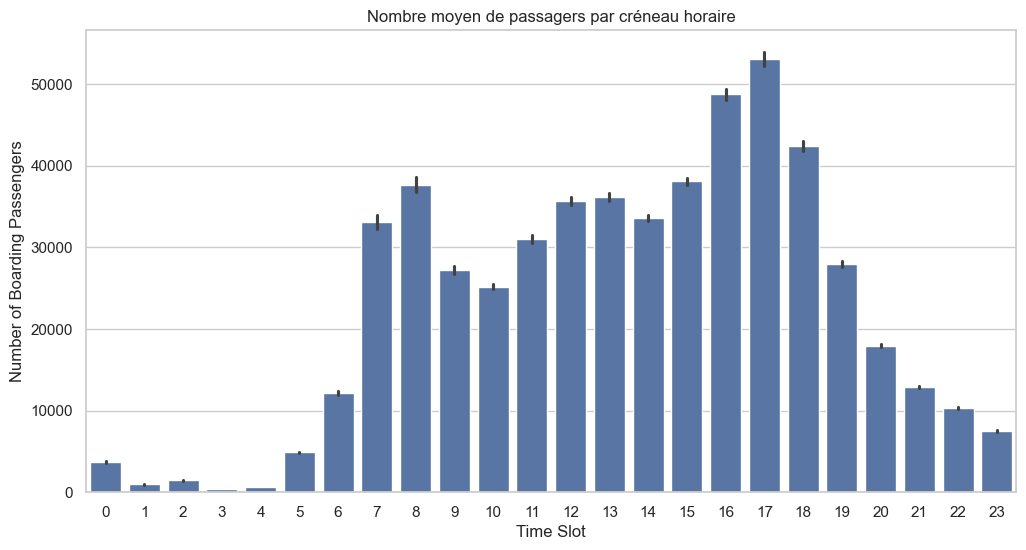

In [45]:
# Moyenne de passagers par créneau horaire
plt.figure()
sns.barplot(x='Time Slot', y='Number of Boarding Passengers', data=df, estimator=np.mean)
plt.title("Nombre moyen de passagers par créneau horaire")
plt.show()

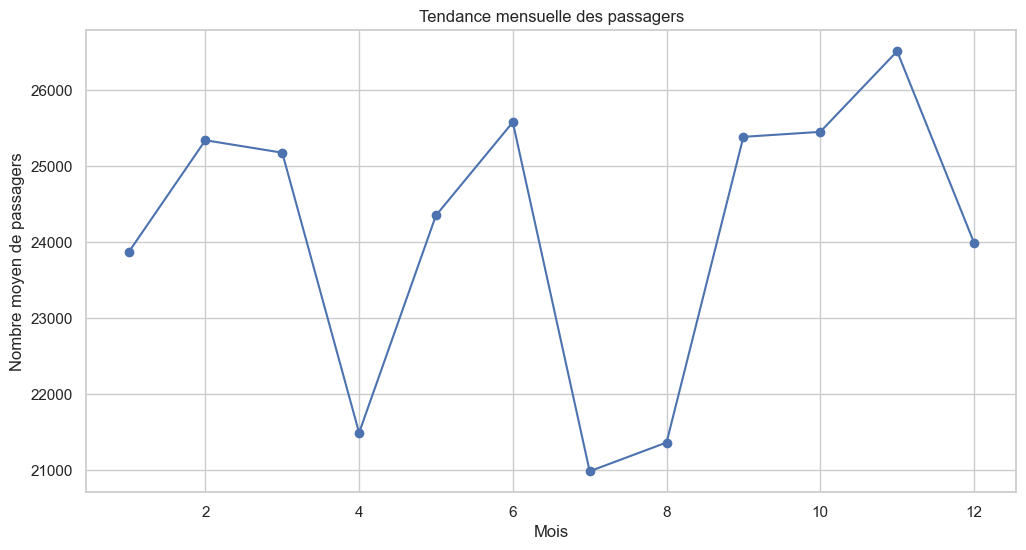

In [46]:
# Tendance mensuelle des passagers
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Number of Boarding Passengers'].mean()
plt.figure()
monthly_avg.plot(marker='o')
plt.title("Tendance mensuelle des passagers")
plt.xlabel("Mois")
plt.ylabel("Nombre moyen de passagers")
plt.grid(True)
plt.show()

La fréquentation varie **au cours de l’année**, avec des **pics en juin et octobre-novembre** et des **creux en avril et juillet**, reflétant une **saisonnalité claire** et des comportements liés aux vacances et activités saisonnières, avec une variabilité modérée d’environ 5 000 passagers.


### 10. Corrélation entre les features 

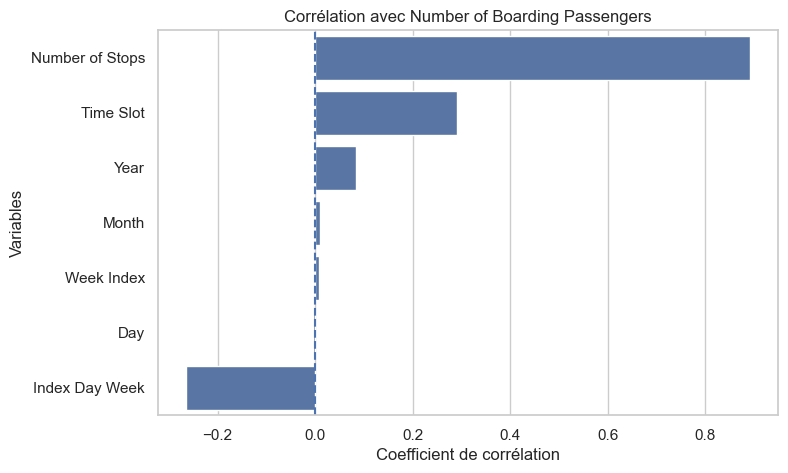

In [47]:
numeric_cols = df.select_dtypes(include='number')

# Corrélation avec la variable cible
corr_target = numeric_cols.corr()['Number of Boarding Passengers'] \
                           .drop('Number of Boarding Passengers') \
                           .sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=corr_target.values,
    y=corr_target.index
)
plt.title("Corrélation avec Number of Boarding Passengers")
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables")
plt.axvline(0, linestyle='--')
plt.show()


Ce graphique montre la corrélation entre le nombre de passagers montants et les autres variables numériques. On observe que seules certaines variables présentent une relation significative(comme Number of Stops ), tandis que d’autres ont une corrélation faible ou nulle et n’apportent pas d’information pertinente pour la prédiction.

In [48]:
df.shape

(54845, 11)

In [49]:
df.columns

Index(['Date', 'Day Week', 'Week Index', 'Index Day Week', 'Time Slot',
       'Number of Boarding Passengers', 'Number of Stops', 'Schedule Type',
       'Day', 'Month', 'Year'],
      dtype='object')

### 11. Sauvegarde des données nettoyées

In [50]:
df.to_pickle("clean_data/rider_ship_clean.pkl")

In [51]:
df.to_csv("clean_data/rider_ship_clean.csv")

In [52]:
print(f"Dataset nettoyé sauvegardé avec {df.shape[0]} lignes et {df.shape[1]} colonnes")

Dataset nettoyé sauvegardé avec 54845 lignes et 11 colonnes
